<a href="https://colab.research.google.com/github/pravardhanreddy/pixhawk/blob/master/yolov5-custom-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install Requirements

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14400, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 14400 (delta 14), reused 16 (delta 6), pack-reused 14371
Receiving objects: 100% (14400/14400), 13.61 MiB | 30.10 MiB/s, done.
Resolving deltas: 100% (9908/9908), done.
/content/yolov5
     |████████████████████████████████| 182 kB 4.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 54.6 MB/s 
     |████████████████████████████████| 42 kB 763 kB/s 
     |████████████████████████████████| 67 kB 3.4 MB/s 
     |████████████████████████████████| 138 kB 26.5 MB/s 
     |████████████████████████████████| 145 kB 69.6 MB/s 
     |████████████████████████████████| 178 kB 65.5 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
Setup complete. Using torch 1.13.0+cu116 (Tesla T4)


In [2]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [3]:
#paste the code snippet from Roboflow here
from roboflow import Roboflow
rf = Roboflow(api_key="AiqyBFRmSfNaqj1qSMGb")
project = rf.workspace("bezzo-robotics").project("house-and-tarp")
dataset = project.version(5).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/House-and-Tarp-5 in yolov5pytorch:: 100%|██████████| 524/524 [00:00<00:00, 1433.38it/s]


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: 500 is a good starting point)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from `yolov5(n,s,m,l,x).pt` It will be automatically downloaded
- **cache:** cache images for faster training
![Models](https://github.com/ultralytics/yolov5/releases/download/v1.0/model_comparison.png)

In [4]:
!python train.py --img 640 --batch 16 --epochs 500 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/House-and-Tarp-5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/House-and-Tarp-5/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/datasets/House-and-Tarp-5/test/images/out1_mp4-15_jpg.rf.8144a30f2b7d685508d089b6ccf6efd5.jpg: 416x416 1 Tarp, 8.1ms
image 2/20 /content/datasets/House-and-Tarp-5/test/images/out1_mp4-16_jpg.rf.252b0063db3dbae8e872e84d01e1ff5c.jpg: 416x416 1 Tarp, 8.7ms
image 3/20 /content/datasets/House-and-Tarp-5/t

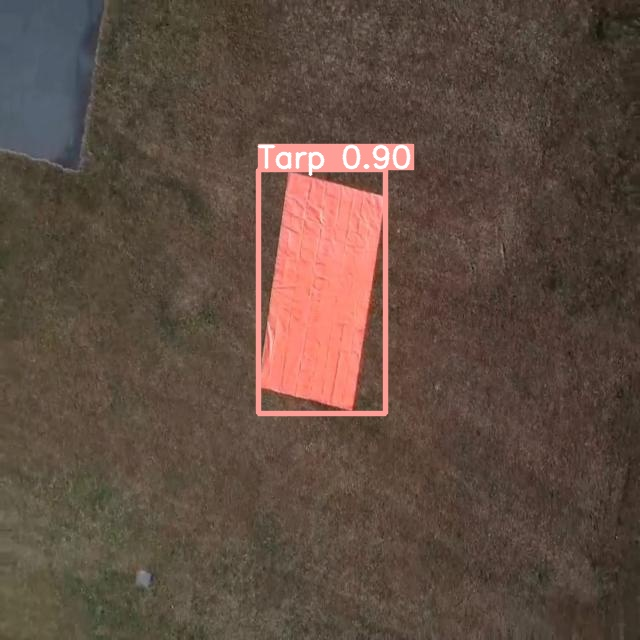

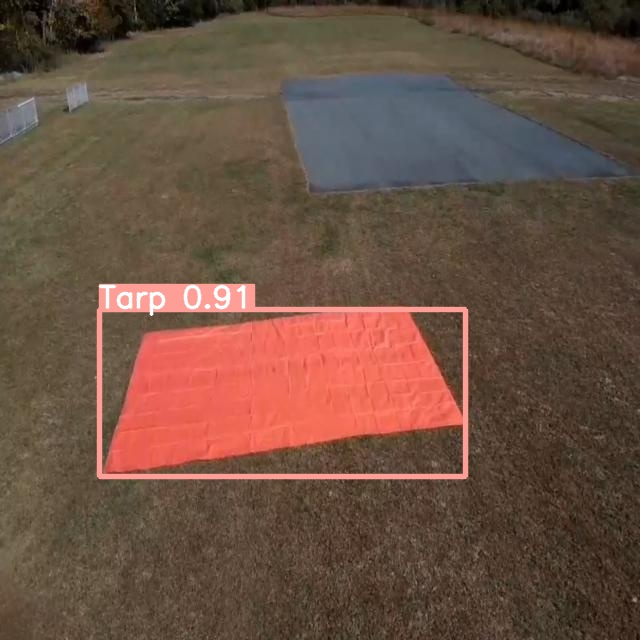

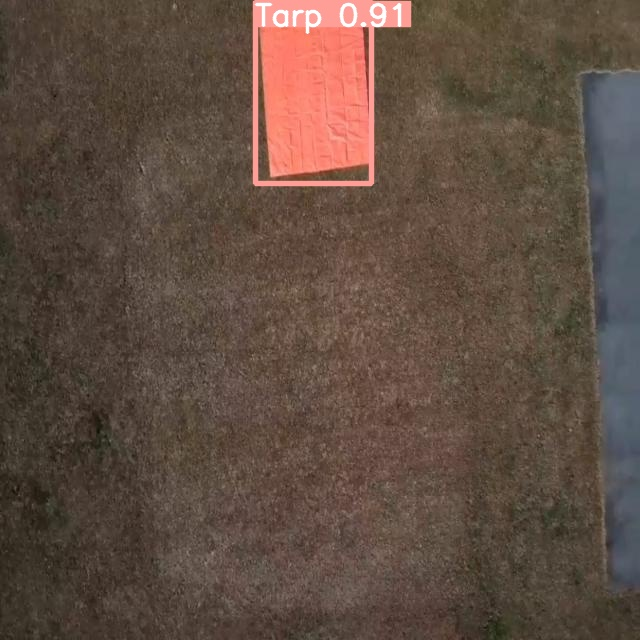

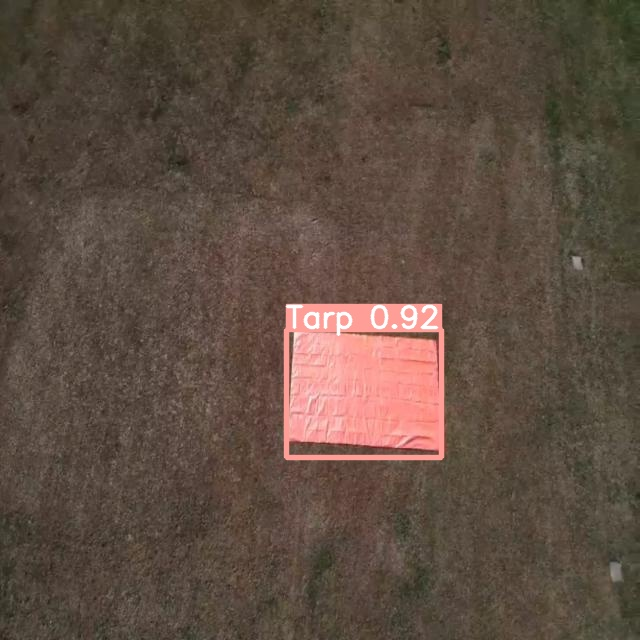

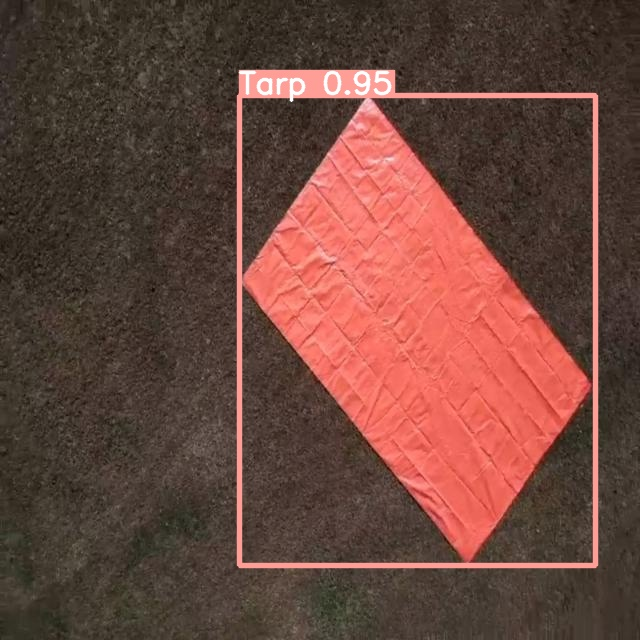

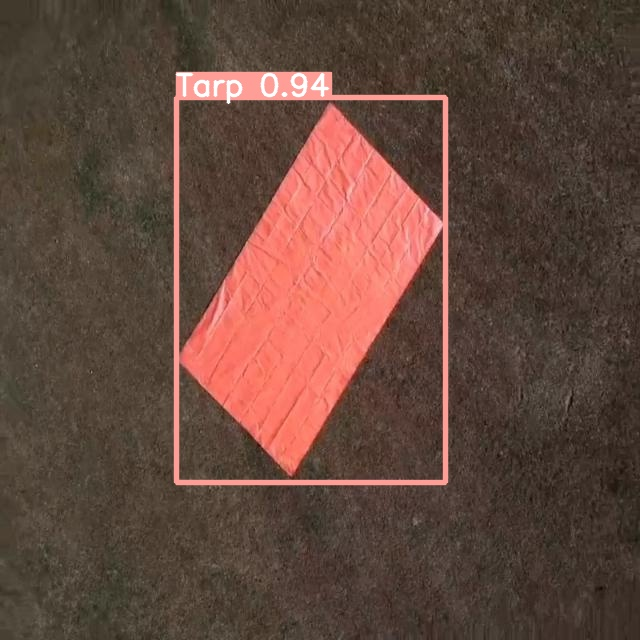

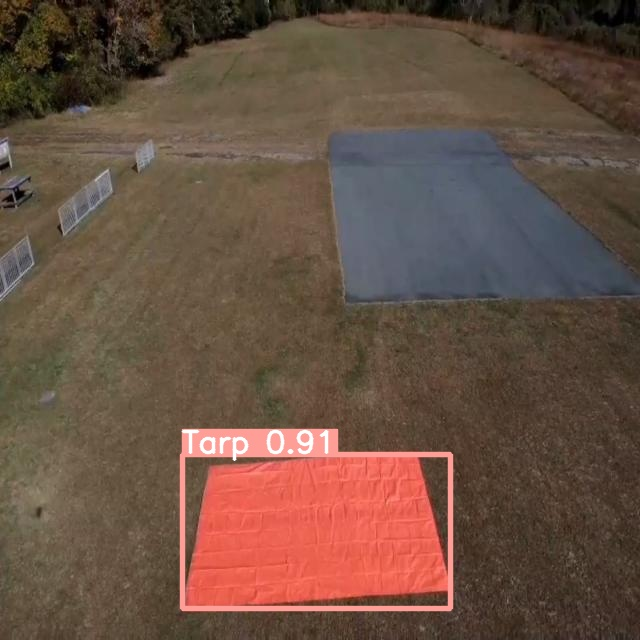

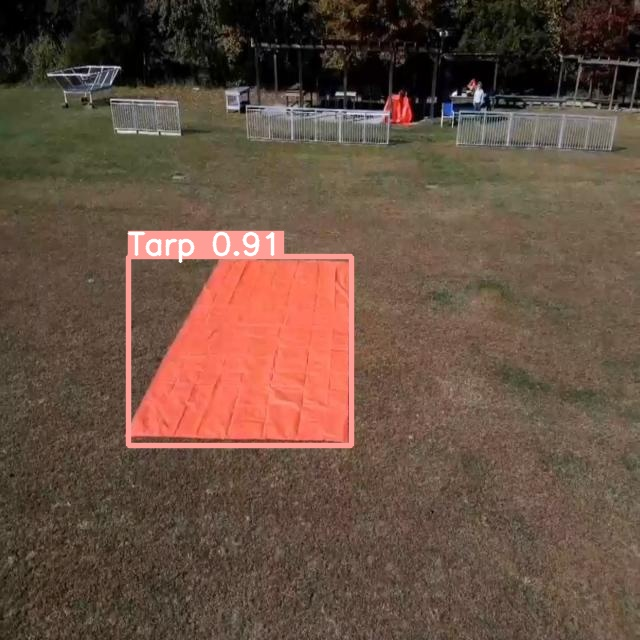

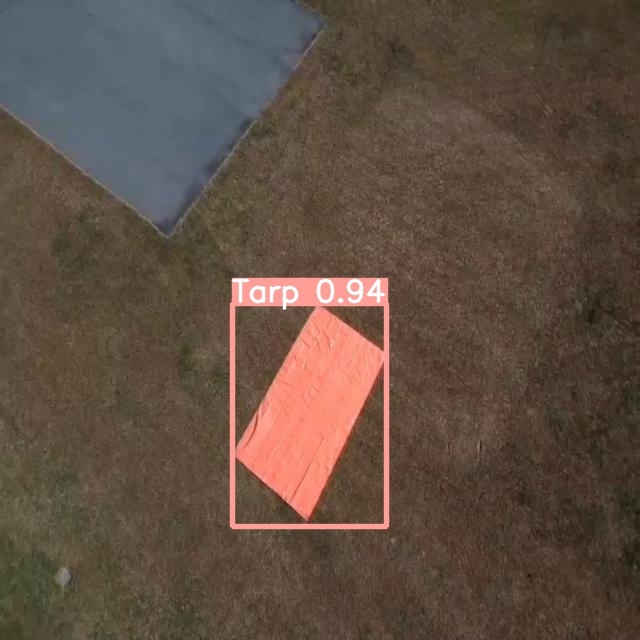

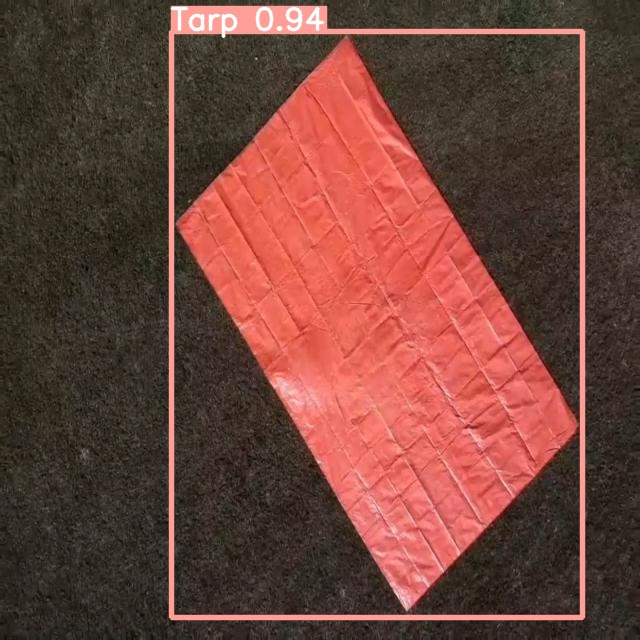

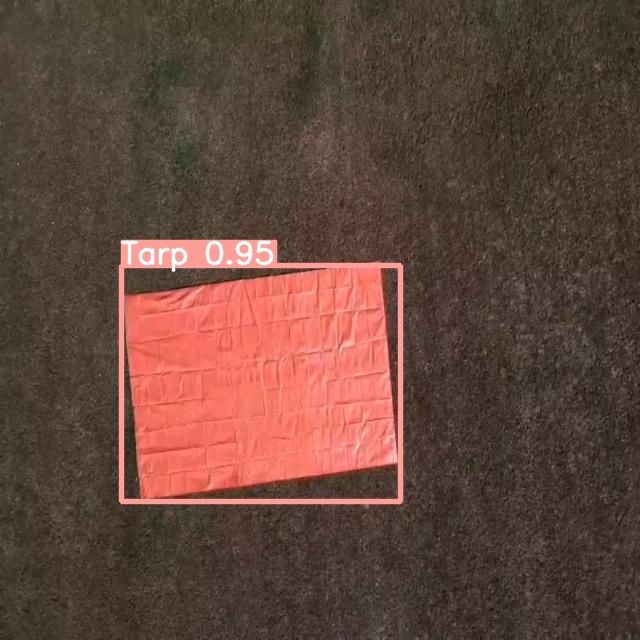

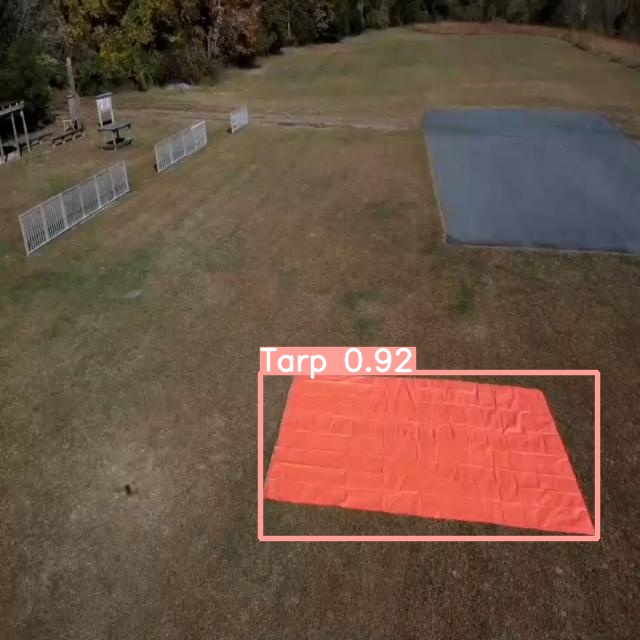

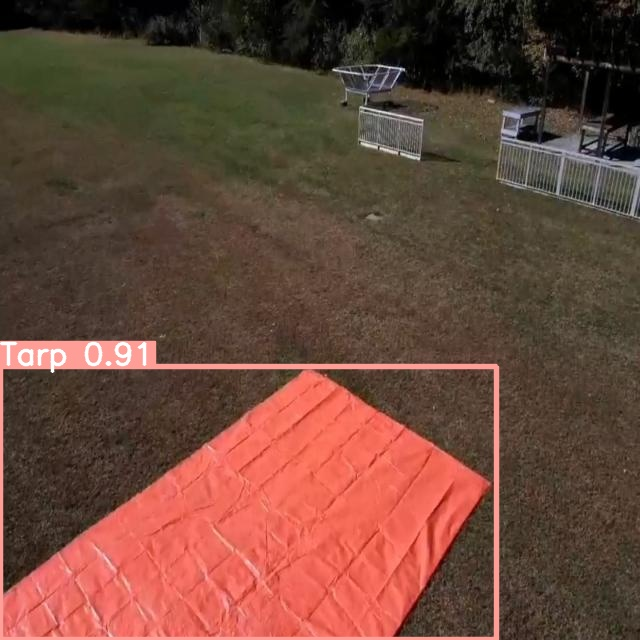

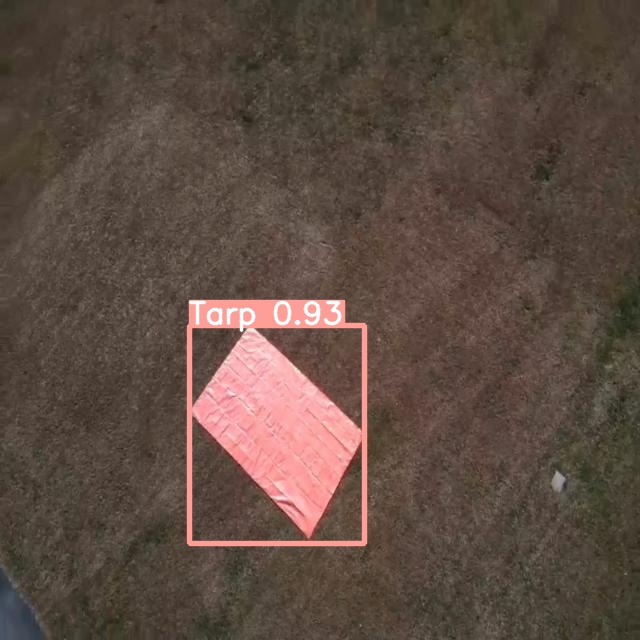

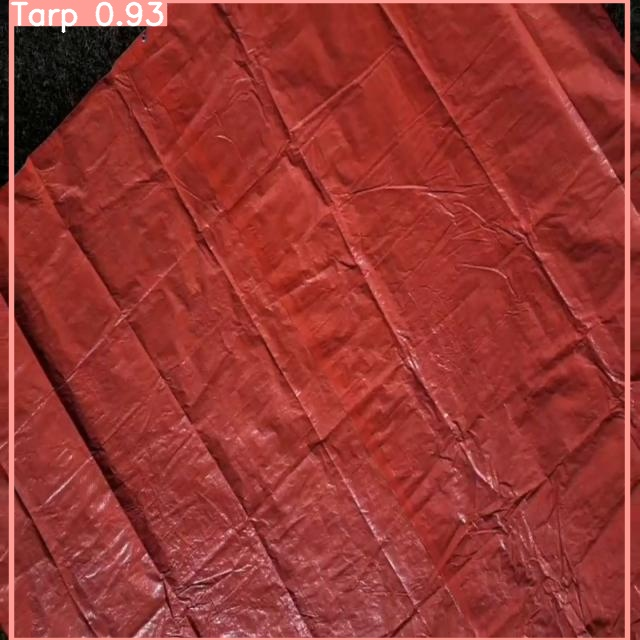

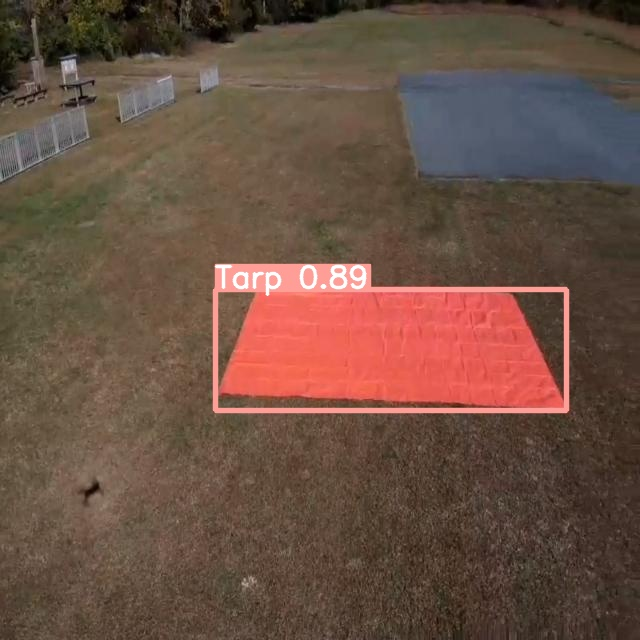

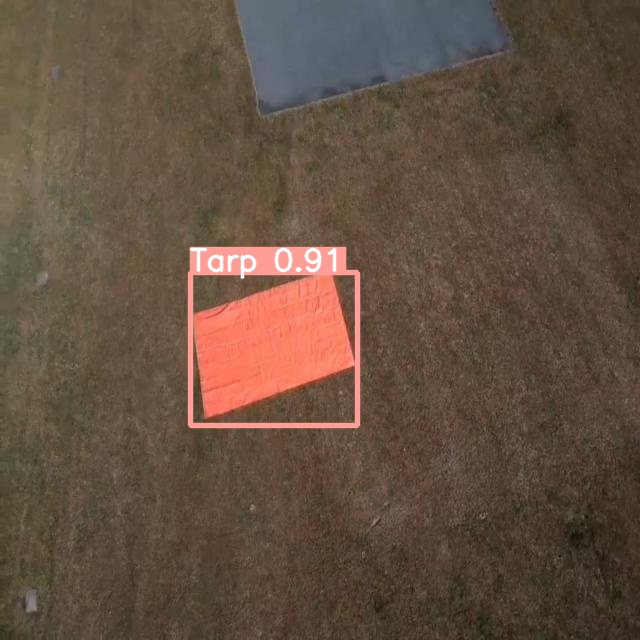

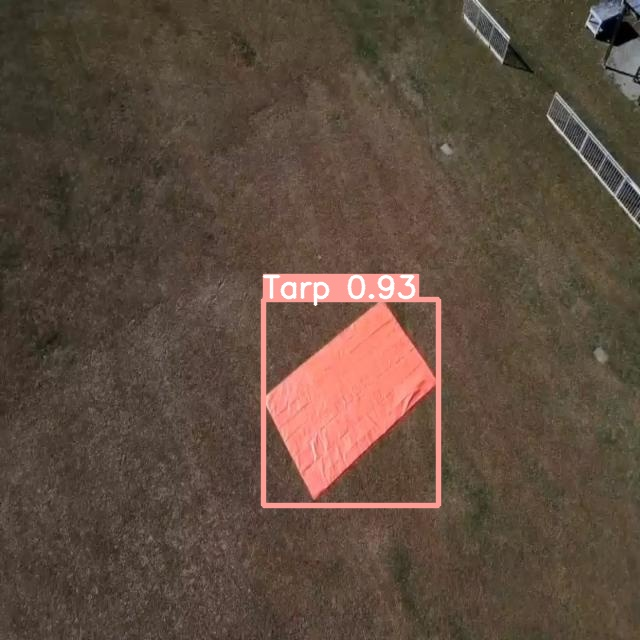

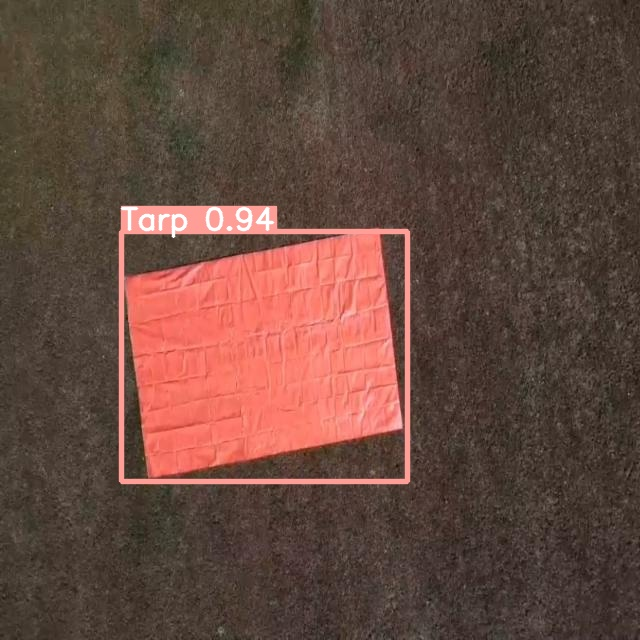

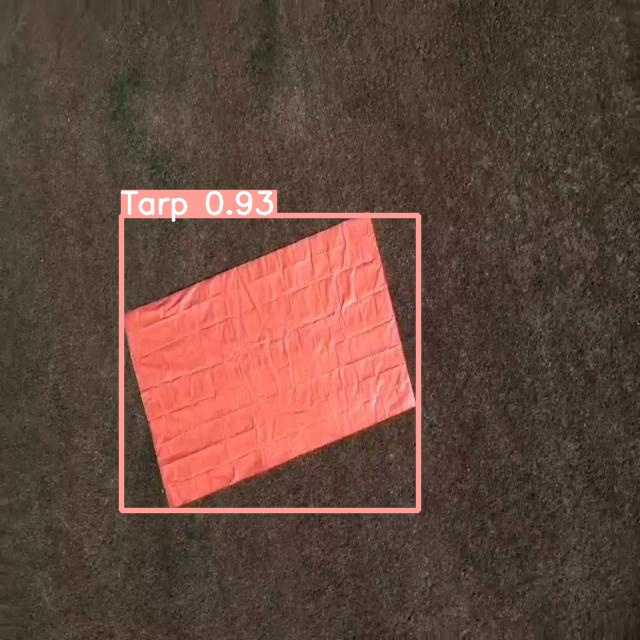

In [6]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Download the trained model

In [7]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>